# Phishing Email Detection
Interactive analysis of training results and adversarial attacks.

In [23]:
import sys, os
sys.path.insert(0, '../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from preprocessing import load_dataset, initial_cleaning, preprocess_texts, split_data
from evaluation import load_and_compare_all_metrics

%matplotlib inline
plt.rcParams['figure.dpi'] = 120

## 1. Eksploracija podataka

In [24]:
df = load_dataset()
df = initial_cleaning(df)
df = preprocess_texts(df)
print(df.shape)
df.head()

(18634, 4)


,Email Text,Email Type,clean_text,label
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,re disc uniformitarianism re sex lang dick hud...,0
1,the other side of * galicismos * * galicismo *...,Safe Email,the other side of galicismos galicismo is a sp...,0
2,re : equistar deal tickets are you still avail...,Safe Email,re equistar deal tickets are you still availab...,0
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email,hello i am your hot lil horny toy i am the one...,1
4,software at incredibly low prices ( 86 % lower...,Phishing Email,software at incredibly low prices lower draper...,1


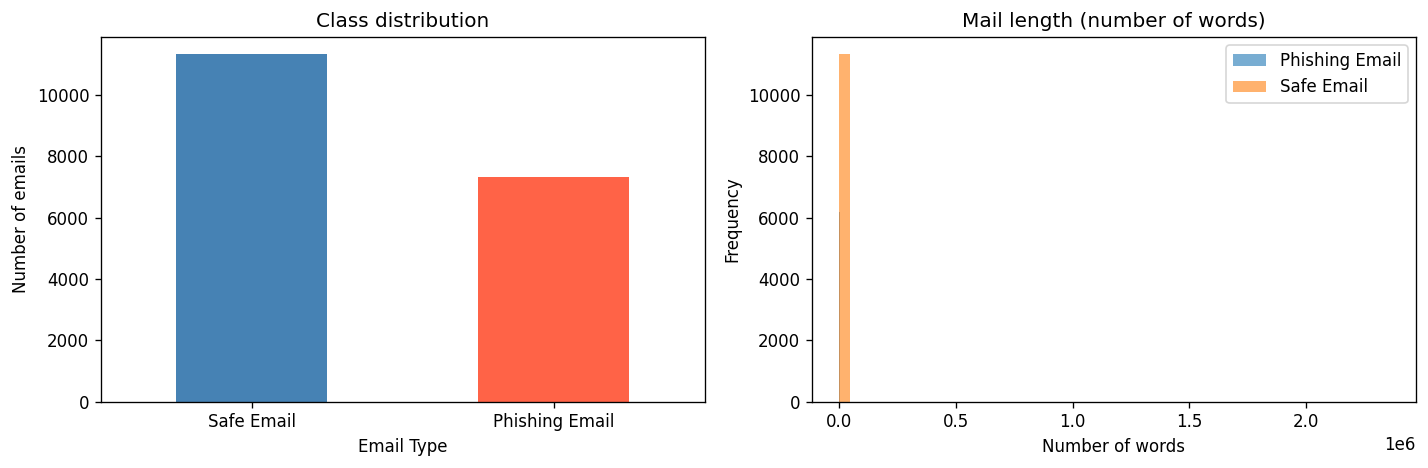

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df['Email Type'].value_counts().plot.bar(ax=axes[0], color=['steelblue','tomato'])
axes[0].set_title('Class distribution')
axes[0].set_ylabel('Number of emails')
axes[0].tick_params(rotation=0)

df['text_len'] = df['clean_text'].str.split().str.len()
df.groupby('Email Type')['text_len'].plot.hist(
    bins=50, alpha=0.6, ax=axes[1], legend=True)
axes[1].set_title('Mail length (number of words)')
axes[1].set_xlabel('Number of words')

plt.tight_layout()
plt.savefig('../results/eda_plots.png', dpi=150)
plt.show()

## 2. Comparison of all models

In [26]:
import glob
import json
import pandas as pd

files = sorted(glob.glob('../results/**/*_metrics.json', recursive=True))

all_metrics = []
for f in files:
    with open(f) as fh:
        all_metrics.append(json.load(fh))

if all_metrics:
    metrics_df = pd.DataFrame(all_metrics).set_index('model')
    
    numeric_cols = ['accuracy', 'precision', 'recall', 'f1']
    metrics_df = metrics_df[numeric_cols]
    
    display(metrics_df.style.highlight_max(axis=0, color='green').highlight_min(axis=0, color='blue').format('{:.4f}'))

,accuracy,precision,recall,f1
model,,,,
lstm_char_swap,0.9257,0.8479,0.9877,0.9125
lstm_synonym,0.9632,0.9443,0.9631,0.9536
lstm_whitespace,0.9646,0.9439,0.9672,0.9554
lstm,0.9649,0.9446,0.9672,0.9557
lstm_retrain,0.9885,0.9721,0.9993,0.9855
tfidf_char_swap,0.9600,0.9368,0.9631,0.9497
tfidf_synonym,0.9697,0.9542,0.9692,0.9617
tfidf_whitespace,0.9689,0.9517,0.9699,0.9607
tfidf_retrain,0.9887,0.9727,0.9993,0.9858


## 3. Confusion matrix visualisation

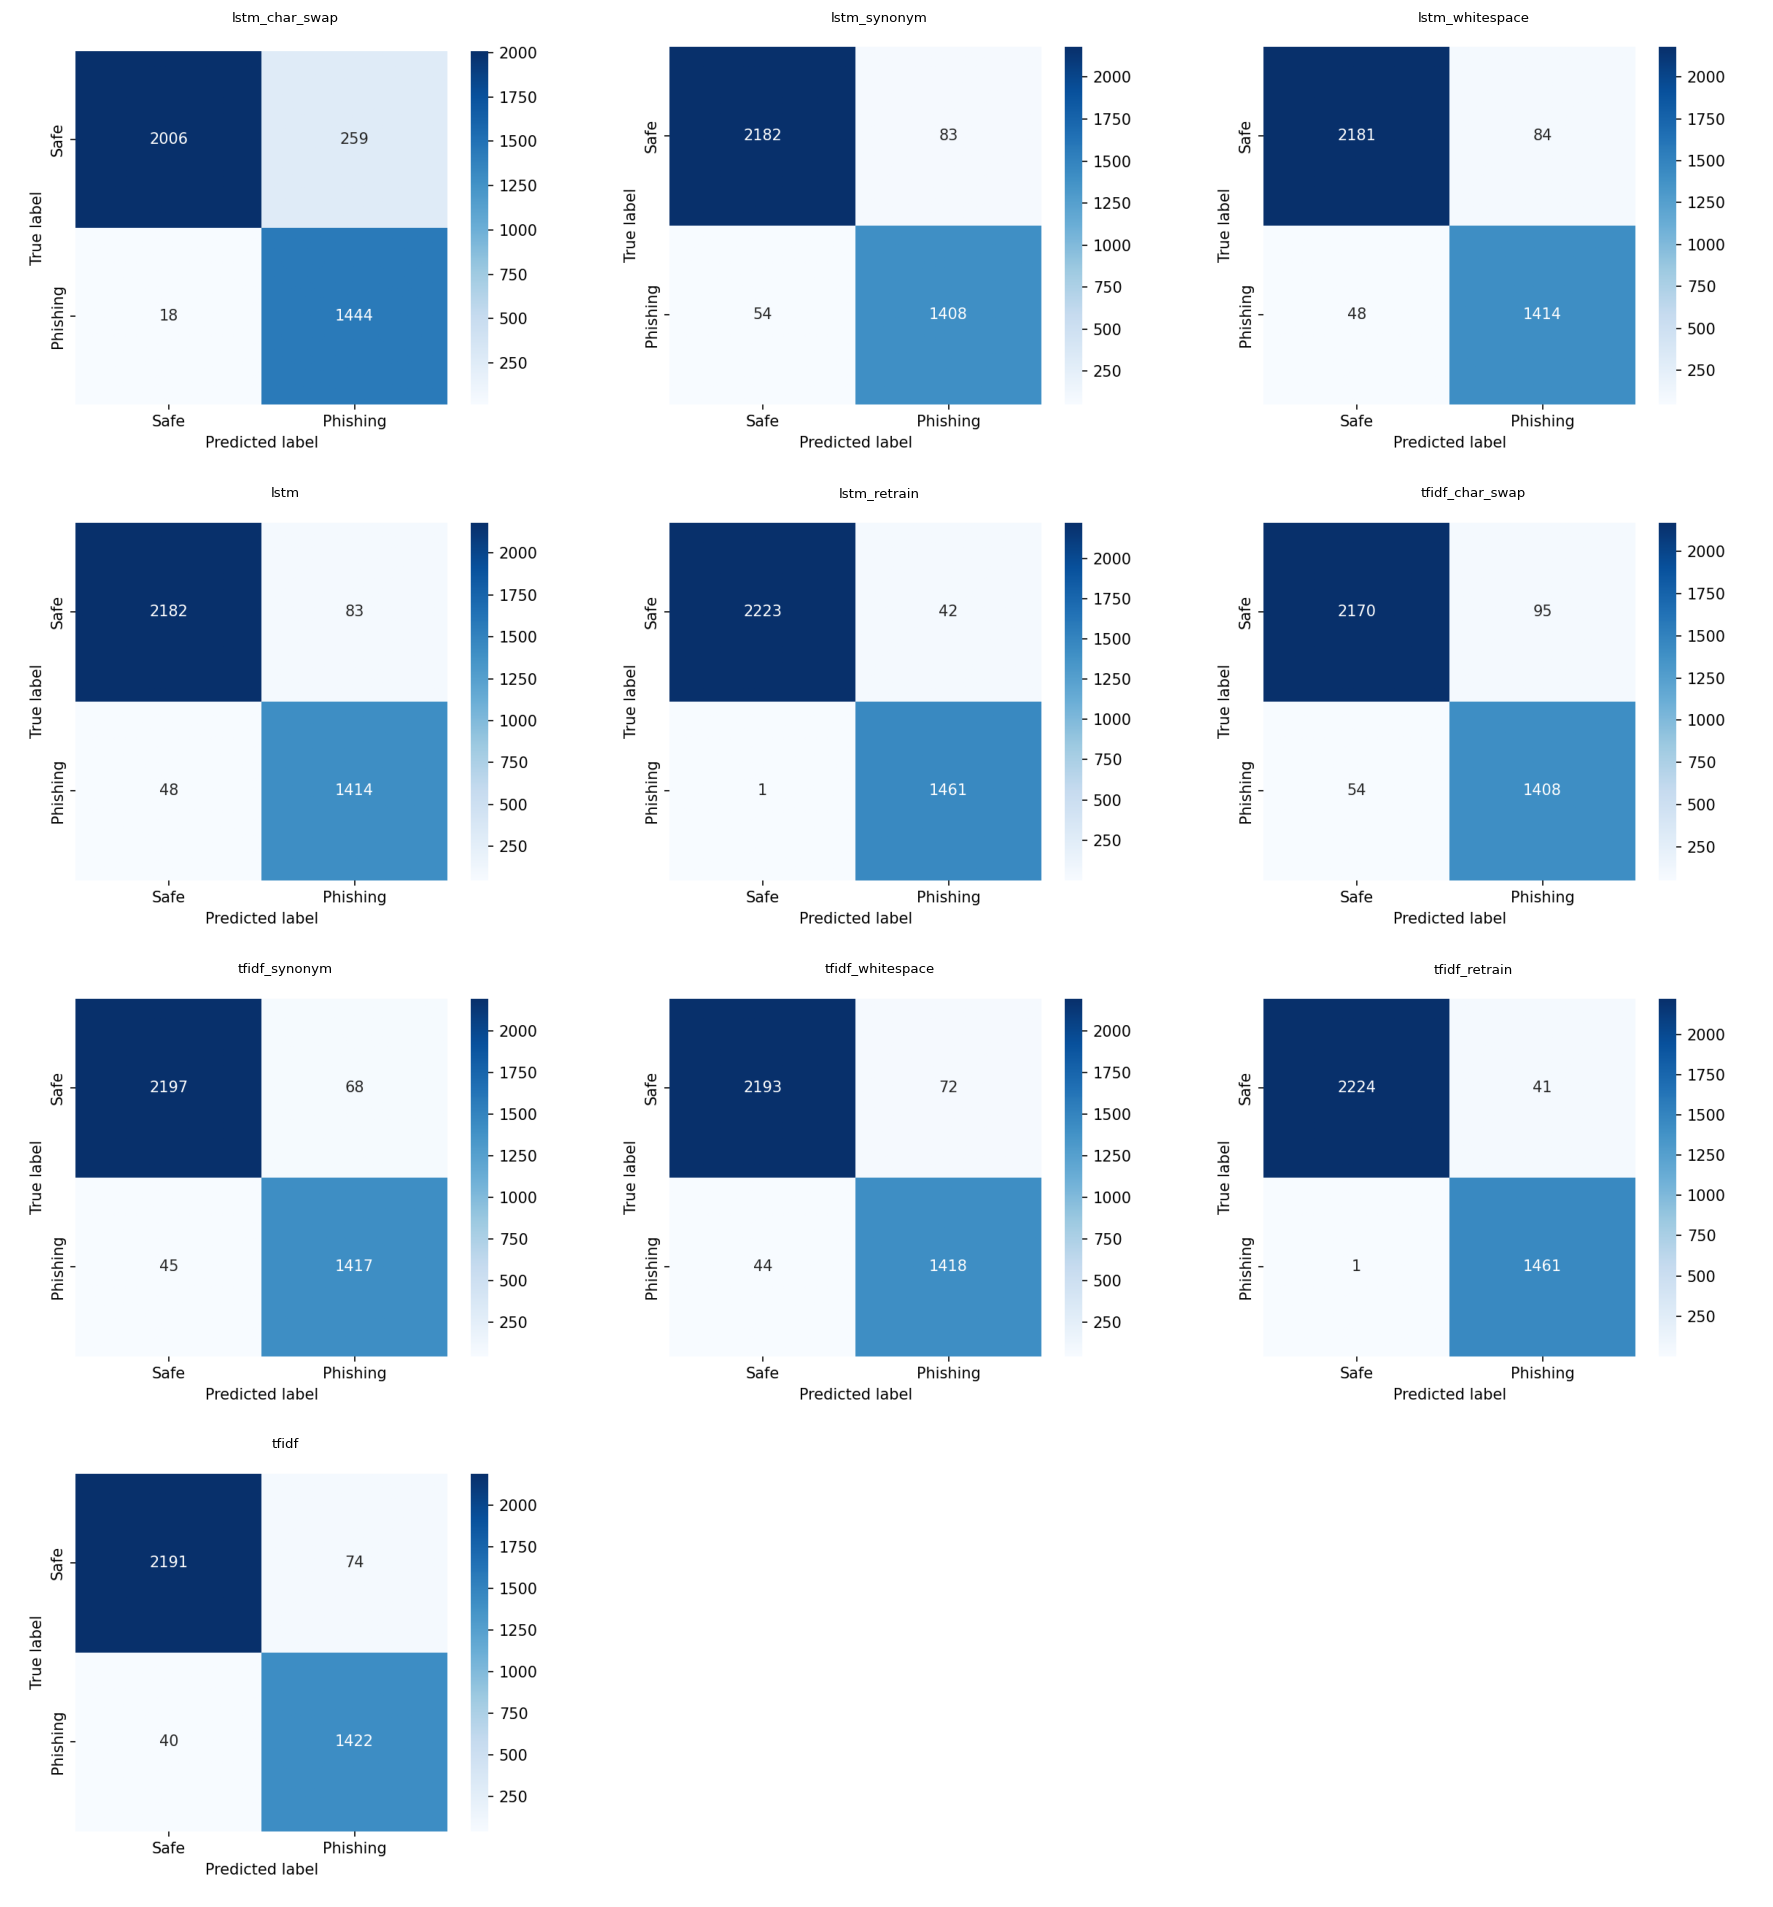

In [27]:
import glob
import os
import matplotlib.pyplot as plt

cm_images = sorted(glob.glob('../results/**/*confusion_matrix.png', recursive=True))

cols = 3
rows = (len(cm_images) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
axes = axes.flatten()

for ax, img_path in zip(axes, cm_images):
    img = plt.imread(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(os.path.basename(img_path).replace('_confusion_matrix.png',''), fontsize=8)

for ax in axes[len(cm_images):]:
    ax.axis('off')

plt.tight_layout()
plt.show()